Here we are trying to predict tip based on total bill and party amount.

Turn the regression problem into a classification problem by binning.

In [23]:
%matplotlib inline
from pydataset import data
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

Load the data:

In [24]:
tips = data('tips')
tips = tips[['total_bill', 'tip', 'size']]
tips.head()

,total_bill,tip,size
1,16.99,1.01,2
2,10.34,1.66,3
3,21.01,3.50,3
4,23.68,3.31,2
5,24.59,3.61,4


Our goal is to predict tip amount.

Let's bin the target variable so we can solve this as a classification problem:

In [25]:
# Create the feature
tips['tip_bin'] = pd.qcut(tips.tip, 3, labels=['bad tip', 'okay tip', 'good tip'])

In [26]:
# Explore our new feature
tips.groupby('tip_bin').tip.agg(['mean', 'count'])

,mean,count
tip_bin,,
bad tip,1.730120,83
okay tip,2.771125,80
good tip,4.522099,81


Split our data into X and y

In [27]:
X = tips[['total_bill', 'size']]
y = tips['tip_bin']

In [28]:
X.head()

,total_bill,size
1,16.99,2
2,10.34,3
3,21.01,3
4,23.68,2
5,24.59,4


In [29]:
y.head()

1     bad tip
2     bad tip
3    good tip
4    good tip
5    good tip
Name: tip_bin, dtype: category
Categories (3, object): [bad tip < okay tip < good tip]

Train-test split

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

Fit the model

In [31]:
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Evaluate performance:

In [32]:
model.score(X_train, y_train)


0.6338797814207651

In [33]:
model.score(X_test, y_test)


0.639344262295082

In [34]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

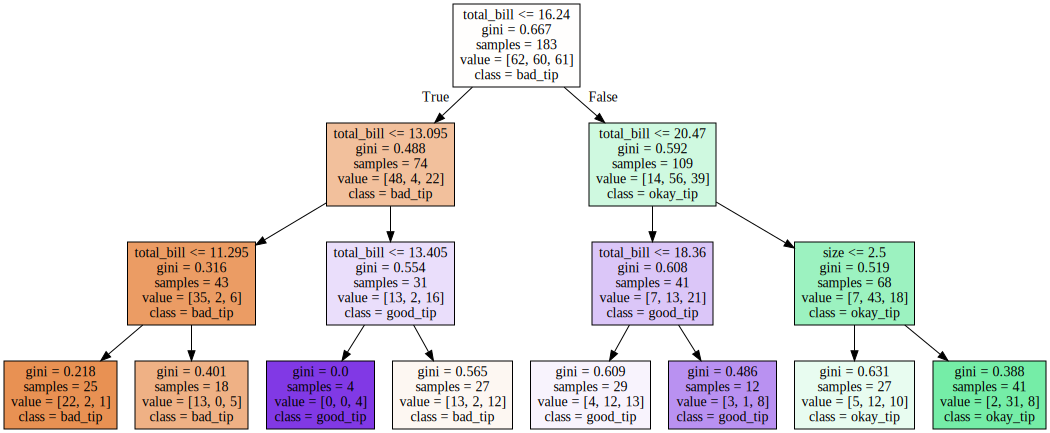

In [35]:
labels = X.columns

graph = Source(tree.export_graphviz(model, out_file=None
   , feature_names=labels, class_names=['bad_tip', 'okay_tip', 'good_tip'] 
   , filled = True))

display(SVG(graph.pipe(format='svg')))

Hooray!?



# Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [47]:
logit = LogisticRegression(C=1, random_state = 123)

In [48]:
logit.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=123, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
print('Coefficient: /n', logit.coef_)

Coefficient: /n [[-0.16898167 -0.00390251]
 [ 0.07939     0.29883211]
 [ 0.01919451 -0.31379975]]


In [50]:
y_pred = logit.predict(X_train)

In [51]:
y_pred_proba = logit.predict_proba(X_train)

In [52]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(X_train, y_train)))

Accuracy of Logistic Regression classifier on training set: 0.55


In [53]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

     bad tip       0.58      0.79      0.67        62
    good tip       0.59      0.60      0.60        60
    okay tip       0.42      0.26      0.32        61

    accuracy                           0.55       183
   macro avg       0.53      0.55      0.53       183
weighted avg       0.53      0.55      0.53       183



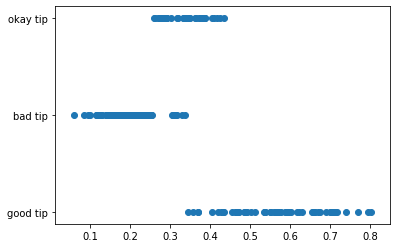

In [54]:
y_pred_proba = [i[1] for i in y_pred_proba]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(y_pred_proba, y_pred)

plt.show()